<a href="https://colab.research.google.com/github/gmatsuna/alura_imersao_gemini_ia/blob/main/imersao_gemini_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tradutor de Japonês para Português com Foco em Gírias:***\
*Utilidade:* Facilitar a compreensão de gírias e expressões coloquiais japonesas, que muitas vezes não são traduzidas corretamente por tradutores convencionais.\
*Criatividade:* Combinar tradução automática neural (NMT) com um dicionário personalizado de gírias e expressões idiomáticas japonesas.\
*Eficácia:* Medir a qualidade da tradução considerando a fluência e a precisão na tradução de gírias, comparando com traduções humanas.\
*Apresentação:* Desenvolver uma extensão de navegador ou aplicativo móvel que permita aos usuários traduzir textos em japonês com a opção de focar em gírias e expressões informais.

Configuração.

In [177]:
!pip install -q -U google-generativeai
!pip install pillow

In [178]:
import textwrap
import google.generativeai as genai
import urllib.request
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

In [179]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5
}

In [180]:
safety_settings = {
    "Harassment": "BLOCK_NONE",
    "Hate": "BLOCK_NONE",
    "Sexual": "BLOCK_NONE",
    "Dangerous": "BLOCK_NONE"
}

Modelo.

In [181]:
model = genai.GenerativeModel(model_name='gemini-1.0-pro', generation_config= generation_config, safety_settings= safety_settings)
chat = model.start_chat(history=[])

Executando


Do link a seguir escolha um kanji, copie o link da imagem e cole quando for solicitado.

In [213]:
url = input("Cole a url da imagem contendo a foto da comida: ")

Cole a url da imagem contendo a foto da comida: https://www.ozmall.co.jp/restaurant/images/4200/r_2.jpg


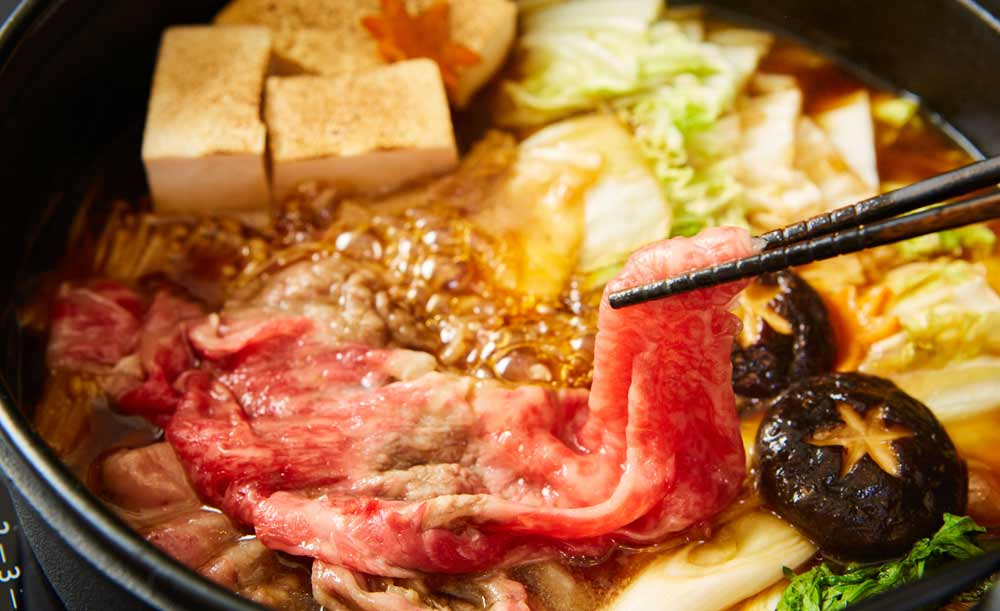

In [214]:
imagem = requests.get(url)
img = Image.open(BytesIO(imagem.content)).convert('RGB')
img

In [215]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(["Qual é a comida da imagem? Explique com mais detalhes os ingredientes e como é feito.", img], stream=True)
response.resolve()

def to_markdown(text):
  text = text.replace('"', "'")
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}:** {message.parts[0].text}"))
  print()

to_markdown(response.text)

>  A comida da imagem é umsukiyaki, um prato japonês que consiste em carne, vegetais e macarrão cozidos em uma panela de ferro fundido. A carne é geralmente fatiada e os vegetais são cortados em pedaços pequenos. O macarrão é geralmente udon ou soba. O sukiyaki é servido com um molho à base de shoyu, saquê e açúcar.
> 
> Para fazer o sukiyaki, primeiro-se aquece a panela de ferro fundido em fogo médio. Em seguida, adiciona-se a carne e os vegetais e cozinha-se até que estejam cozidos. Em seguida, adiciona-se o macarrão e o molho e cozinha-se até que o macarrão esteja cozido. O sukiyaki é geralmente servido com arroz e pickles.